### 导入必要的模块

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__

'2.0.0'

### 图像编码处理
由于 TensorFlow2.x 使用的 eager Execution，解码后的图片可以直接带入 plt.show()，即下面 `plt.imshow(img_data.numpy())` 与 `plt.imshow(img_data)`等价，图像读入与解码函数为 TensorFlow2.x 的 `io` 模块

image_data decode type:
 <class 'tensorflow.python.framework.ops.EagerTensor'>
image_data decode shape:
 (554, 578, 3)
image_data decode value:
 [[[ 32  42   7]
  [ 26  36   1]
  [ 20  30   0]
  ...
  [ 59  63  64]
  [ 61  65  66]
  [ 61  65  66]]

 [[112 122  87]
  [107 117  80]
  [101 111  76]
  ...
  [ 66  70  71]
  [ 67  71  72]
  [ 67  71  72]]

 [[114 124  87]
  [110 121  81]
  [105 115  78]
  ...
  [ 69  73  74]
  [ 69  73  74]
  [ 69  73  74]]

 ...

 [[194 185 176]
  [195 186 177]
  [198 189 180]
  ...
  [120 110 108]
  [131 122 117]
  [131 122 117]]

 [[194 185 176]
  [195 186 177]
  [196 187 178]
  ...
  [140 130 128]
  [136 127 122]
  [136 127 122]]

 [[190 181 172]
  [191 182 173]
  [193 184 175]
  ...
  [147 137 135]
  [160 151 146]
  [160 151 146]]]


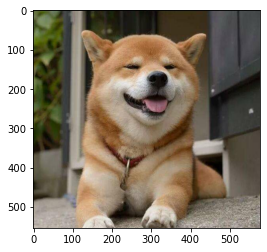

In [2]:
image_raw_data = tf.io.gfile.GFile('./data/dog.jpg', 'rb').read()

img_data = tf.io.decode_jpeg(image_raw_data)

print('image_data decode type:\n', type(img_data))
print('image_data decode shape:\n', img_data.shape)
print('image_data decode value:\n', img_data.numpy())

plt.imshow(img_data.numpy())
plt.show()

### 图像缩放函数，tf.image.resize()
tf.image.resize(  
&ensp;&ensp;&ensp;&ensp;images, size, method=ResizeMethod.BILINEAR, preserve_aspect_ratio=False,  
&ensp;&ensp;&ensp;&ensp;antialias=False, name=None  
)  
antialias: 对图像进行下采样时是否使用抗混叠滤波器  
其他参数含义与 TensorFLow1.x 相同，需要注意的是 method 参数，在 TensorFlow1.x 中其值为 0、1、2、3 分别代表四种缩放方式，在 TensorFlow2.x 中其值如下  
bilinear: 双线性插值。如果'antialias'为true，则在下采样时变为半径为1的帽子/帐篷过滤器功能  
lanczos3: 半径为 3 的 Lanczos 核  
lanczos5: 半径为 5 的 Lanczos 核  
bicubic: 双立方插值  
gaussian: 半径为 3 的高斯核，sigma = 1.5 / 3.0  
nearest: 最近邻插值  
area: 像素区域插值
mitchellcubic：Mitchell-Netravali双立方插值滤波器  
**主要了解与TensorFLow1.x 的 4 种方法(双线性插值、最近邻插值、双立方插值、像素区域插值 )就足够使用了**

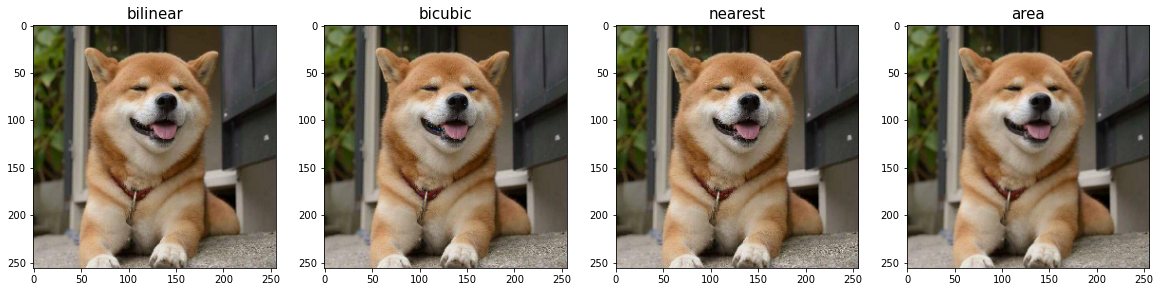

In [3]:
fig = plt.gcf()
fig.set_size_inches(20, 10)

ax_img1 = plt.subplot(1, 4, 1)
resized1 = tf.image.resize(img_data, [256,256], method='bilinear')
resized1 = resized1.numpy().astype('uint8')
ax_img1.imshow(resized1)
ax_img1.set_title('bilinear', fontsize=15)

ax_img2 = plt.subplot(1, 4, 2)
resized2 = tf.image.resize(img_data, [256,256], method='bicubic')
resized2 = resized2.numpy().astype('uint8')
ax_img2.imshow(resized2)
ax_img2.set_title('bicubic', fontsize=15)

ax_img3 = plt.subplot(1, 4, 3)
resized3 = tf.image.resize(img_data, [256,256], method='nearest')
resized3 = resized3.numpy().astype('uint8')
ax_img3.imshow(resized3)
ax_img3.set_title('nearest', fontsize=15)

ax_img4 = plt.subplot(1, 4, 4)
resized4 = tf.image.resize(img_data, [256,256], method='area')
resized4 = resized4.numpy().astype('uint8')
ax_img4.imshow(resized4)
ax_img4.set_title('area', fontsize=15)

plt.show()

### 图像裁剪函数 tf.image.resize_with_crop_or_pad()
tf.image.resize_with_crop_or_pad(  
&ensp;&ensp;&ensp;image, target_height, target_width  
)  

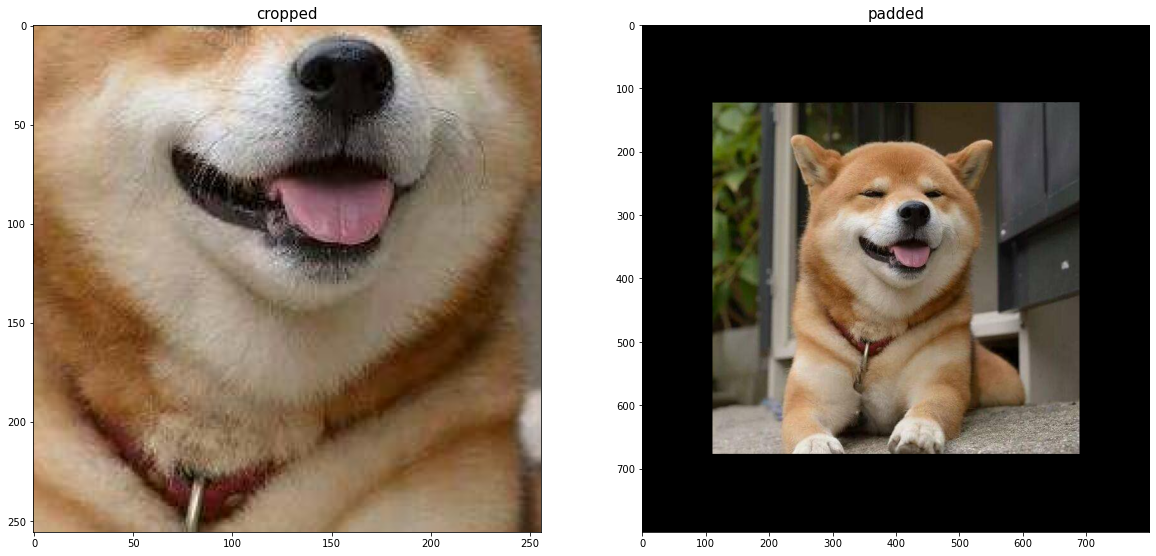

In [4]:
cropped = tf.image.resize_with_crop_or_pad(img_data, 256, 256)
padded = tf.image.resize_with_crop_or_pad(img_data, 800, 800)

fig = plt.gcf()
fig.set_size_inches(20, 10)

ax_img1 = plt.subplot(1, 2, 1)
ax_img1.imshow(cropped)
ax_img1.set_title('cropped', fontsize=15)

ax_img2 = plt.subplot(1, 2, 2)
ax_img2.imshow(padded)
ax_img2.set_title('padded', fontsize=15)
plt.show()

### 随机剪裁函数 tf.image.random_crop()
tf.image.random_crop(  
&ensp;&ensp;&ensp;&ensp;value, size, seed=None, name=None  
)  
用法与 TensorFlow1.x 相同

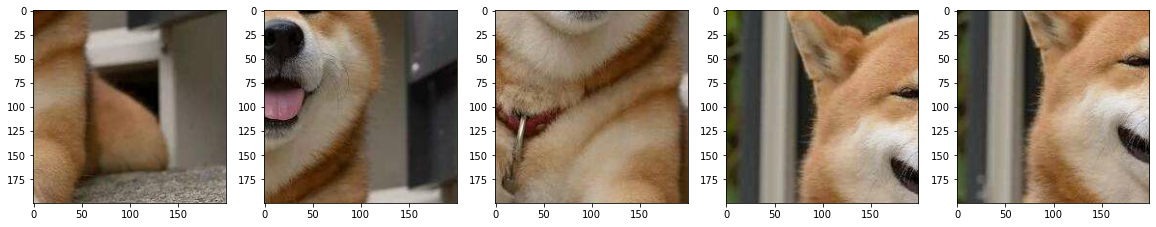

In [5]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
for i in range(5):
    ax_img = plt.subplot(1, 5, i + 1)
    rd_cropped = tf.image.random_crop(img_data, [200, 200, 3])
    ax_img.imshow(rd_cropped.numpy().astype('uint8'))
plt.show()

### 上下翻转与水平翻转 
tf.image.flip_left_right(  
&ensp;&ensp;&ensp;&ensp;image  
)   
左右翻转    
tf.image.flip_up_down(  
&ensp;&ensp;&ensp;&ensp;image  
)   
上下翻转
用法与 TensorFlow1.x 相同

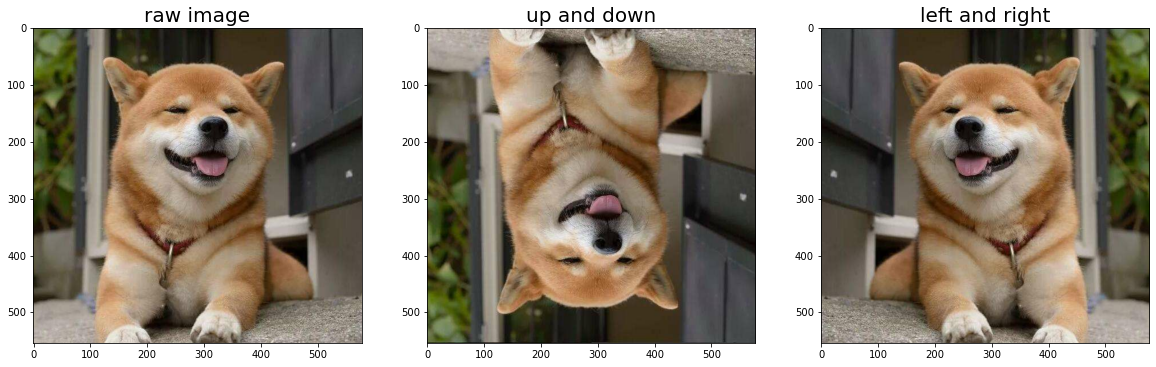

In [6]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax_raw = plt.subplot(1, 3, 1)
ax_raw.imshow(img_data)
ax_raw.set_title('raw image', fontsize=20)

ax_up_down = plt.subplot(1, 3, 2)
img_up_down = tf.image.flip_up_down(img_data)
ax_up_down.imshow(img_up_down)
ax_up_down.set_title('up and down', fontsize=20)

ax_left_right = plt.subplot(1, 3, 3)
img_left_right = tf.image.flip_left_right(img_data)
ax_left_right.imshow(img_left_right)
ax_left_right.set_title('left and right', fontsize=20)
plt.show()

### 改变图像对比度 tf.image.random_contrast() 与 tf.image.adjust_contrast()
tf.image.adjust_contrast(  
&ensp;&ensp;&ensp;&ensp;images, contrast_factor  
)  
tf.image.random_contrast(  
&ensp;&ensp;&ensp;&ensp;image, lower, upper, seed=None  
)  
用法与 TensorFlow1.x 相同

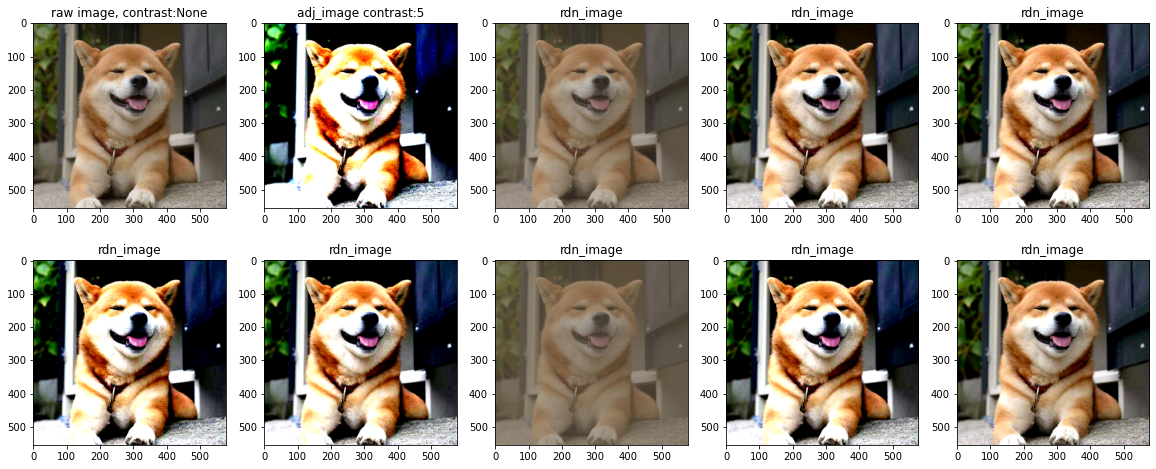

In [7]:
fig = plt.gcf()
fig.set_size_inches(20, 8)

ax_img = plt.subplot(2, 5, 1)
ax_img.imshow(img_data)
ax_img.set_title('raw image' + ', contrast:None', fontsize=12)

ax_img = plt.subplot(2, 5, 2)
contrast = tf.image.adjust_contrast(img_data, 5)
ax_img.imshow(contrast)
ax_img.set_title('adj_image' + ' contrast:5', fontsize=12)

for i in range(2, 10):
    ax_img = plt.subplot(2, 5, i + 1)
    contrast = tf.image.random_contrast(img_data, 0.001, 3)
    ax_img.imshow(contrast)
    ax_img.set_title('rdn_image', fontsize=12)
plt.show()

### 白化处理
将图像的像素值转化成零均值和单位方差，图像标准化  
tf.image.per_image_standardization(  
&ensp;&ensp;&ensp;&ensp;image  
)  

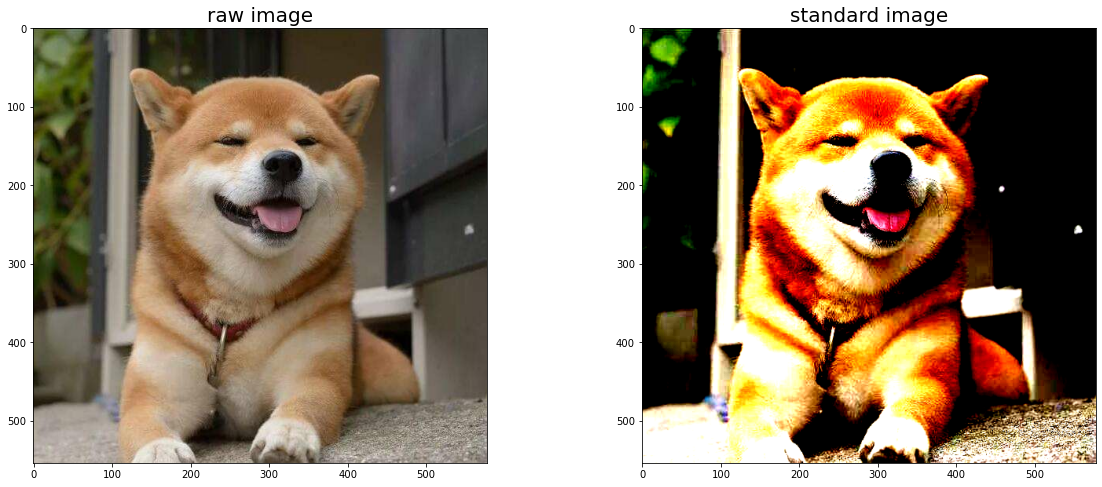

In [9]:
fig = plt.gcf()
fig.set_size_inches(20, 8)

ax_img1 = plt.subplot(1, 2, 1)
ax_img1.imshow(img_data)
ax_img1.set_title('raw image', fontsize=20)

ax_img2 = plt.subplot(1, 2, 2)
standarlization = tf.image.per_image_standardization(img_data)
ax_img2.imshow(standarlization)
ax_img2.set_title('standard image', fontsize=20)

plt.show()